In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/danielluo/Downloads/crime-in-vancouver/crime.csv')

In [4]:
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [5]:
pd.unique(data.TYPE)

array(['Other Theft', 'Break and Enter Residential/Other', 'Mischief',
       'Break and Enter Commercial', 'Offence Against a Person',
       'Theft from Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Injury)',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Theft of Vehicle', 'Homicide', 'Theft of Bicycle'], dtype=object)

In [6]:
data[data.TYPE == 'Homicide']

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
15380,Homicide,2003,10,16,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
15402,Homicide,2003,3,14,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
15520,Homicide,2003,11,4,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
15593,Homicide,2003,7,26,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
15658,Homicide,2003,8,16,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
525609,Homicide,2017,4,15,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
525619,Homicide,2017,6,27,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
525623,Homicide,2017,5,23,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0
525630,Homicide,2017,1,27,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0,0.0,0.0


Lets create a pivot table of neighborhood count of each crime. Note that for Homicides and Personal Offences, location is not recorded, so it isn't included in the following pivot tables.

In [7]:
data['counter'] = 1

## Crime by Neighbourhood

In [8]:
neighborhood_crime = pd.pivot_table(data, values = 'counter', index = 'NEIGHBOURHOOD', columns = 'TYPE', aggfunc='count')
neighborhood_crime['All Crime Count'] = neighborhood_crime.sum(axis=1)
neighborhood_crime.sort_values('All Crime Count')[::-1]


TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,9371,3505,16672,19244,48003,6907,4016,41,3188,110947
West End,2775,3480,5325,6033,16904,2985,2660,6,1184,41352
Fairview,3303,3834,3196,3269,11934,3394,2037,14,1180,32161
Mount Pleasant,2769,3278,4070,3698,9679,2746,2654,18,1624,30536
Grandview-Woodland,2082,4515,4970,2508,7342,1403,3111,9,1240,27180
Renfrew-Collingwood,1197,4296,3886,4119,8420,419,3011,12,1401,26761
Kitsilano,2092,4390,3692,1730,8912,2464,2366,13,1040,26699
Kensington-Cedar Cottage,1277,4136,3760,2961,7474,859,2919,11,1544,24941
Strathcona,2168,2019,4556,994,7343,1015,1650,20,1154,20919


## Crime by Neighbourhood by proportion

In [9]:
neighborhood_crime_percent = round(neighborhood_crime.iloc[:,:9].div(neighborhood_crime['All Crime Count'], axis = 0) * 100, 2)
neighborhood_crime_percent['All Crime Count'] = neighborhood_crime['All Crime Count']
neighborhood_crime_percent.sort_values('All Crime Count')[::-1]


TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,8.45,3.16,15.03,17.35,43.27,6.23,3.62,0.04,2.87,110947
West End,6.71,8.42,12.88,14.59,40.88,7.22,6.43,0.01,2.86,41352
Fairview,10.27,11.92,9.94,10.16,37.11,10.55,6.33,0.04,3.67,32161
Mount Pleasant,9.07,10.73,13.33,12.11,31.70,8.99,8.69,0.06,5.32,30536
Grandview-Woodland,7.66,16.61,18.29,9.23,27.01,5.16,11.45,0.03,4.56,27180
Renfrew-Collingwood,4.47,16.05,14.52,15.39,31.46,1.57,11.25,0.04,5.24,26761
Kitsilano,7.84,16.44,13.83,6.48,33.38,9.23,8.86,0.05,3.90,26699
Kensington-Cedar Cottage,5.12,16.58,15.08,11.87,29.97,3.44,11.70,0.04,6.19,24941
Strathcona,10.36,9.65,21.78,4.75,35.10,4.85,7.89,0.10,5.52,20919


Let me guess which areas are sketchy...

Shaughnessy, Arbutus Ridge, Oakridge, Kerrisdale have a high number of residential break-ins. This indicates to me that either they're just highly residential (and so the only crime that exists is residential break ins). Or that they're just high crime areas.

Fairview, Strathcona, and Mount Pleasant seem like commercial areas that are relatively suss.

Stanley Park, Musqueam seem like nice areas to live in.



Let's look into whether theres a certain time where more crimes occur.

In [10]:
neighborhood_crime_time = pd.pivot_table(data, values = 'HOUR', index = 'NEIGHBOURHOOD', columns = 'TYPE', aggfunc='mean')
neighborhood_crime_time['All Crime Count'] = neighborhood_crime['All Crime Count']
neighborhood_crime_time.sort_values('All Crime Count')[::-1]


TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,10.515847,11.841369,11.609285,14.684837,14.170281,13.890111,14.289841,11.951220,12.857591,110947
West End,10.290811,11.776149,12.966761,15.314935,14.864292,13.937688,15.057143,12.666667,14.000845,41352
Fairview,11.328792,12.679186,13.001564,15.286020,14.659460,13.683559,14.859107,13.785714,13.182203,32161
Mount Pleasant,11.047671,12.360281,12.807617,14.904543,14.494783,14.037509,14.565185,10.500000,13.474138,30536
Grandview-Woodland,11.021134,12.534884,12.871227,14.699362,14.378507,13.660727,14.864995,14.222222,13.530645,27180
Renfrew-Collingwood,11.013367,12.769088,13.259907,15.528041,14.450831,12.844869,14.568914,9.500000,13.607423,26761
Kitsilano,10.365201,12.638497,13.192308,15.247977,14.911355,13.829140,15.367709,12.000000,13.843269,26699
Kensington-Cedar Cottage,10.385278,12.754836,12.978191,14.612969,14.725582,13.853318,14.751627,13.727273,13.775907,24941
Strathcona,11.256919,12.554730,12.341967,14.443662,13.670979,13.573399,13.747273,12.850000,13.383016,20919


In [11]:
neighborhood_crime_time = pd.pivot_table(data, values = 'HOUR', index = 'NEIGHBOURHOOD', columns = 'TYPE', aggfunc='median')
neighborhood_crime_time['All Crime Count'] = neighborhood_crime['All Crime Count']
neighborhood_crime_time.sort_values('All Crime Count')[::-1]


TYPE,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All Crime Count
NEIGHBOURHOOD,,,,,,,,,,
Central Business District,9.0,12.0,12.0,15.0,16.0,15.0,16.0,12.0,14.0,110947
West End,8.0,12.0,15.0,16.0,17.0,16.0,17.0,14.0,15.0,41352
Fairview,12.0,13.0,14.0,16.0,16.0,15.0,17.0,15.0,14.0,32161
Mount Pleasant,11.0,12.0,14.0,15.0,17.0,15.0,17.0,12.5,14.0,30536
Grandview-Woodland,10.0,13.0,15.0,15.0,17.0,15.0,17.0,14.0,15.0,27180
Renfrew-Collingwood,10.0,13.0,15.0,16.0,17.0,13.0,17.0,10.0,14.0,26761
Kitsilano,8.0,13.0,16.0,16.0,17.0,16.0,18.0,12.0,15.0,26699
Kensington-Cedar Cottage,8.0,13.0,15.0,15.0,17.0,15.0,17.0,13.0,15.0,24941
Strathcona,11.0,13.0,13.0,15.0,15.0,15.0,15.0,12.5,14.0,20919


In [12]:
df = data[['HOUR', 'NEIGHBOURHOOD']]

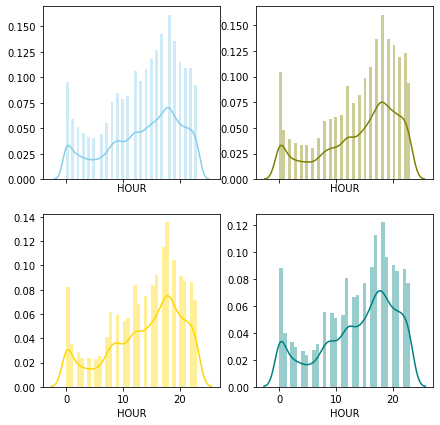

In [13]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df[df.NEIGHBOURHOOD == "Central Business District"].HOUR , color="skyblue", ax=axes[0, 0])
sns.distplot( df[df.NEIGHBOURHOOD == "West End"].HOUR , color="olive", ax=axes[0, 1])
sns.distplot( df[df.NEIGHBOURHOOD == "Fairview"].HOUR , color="gold", ax=axes[1, 0])
sns.distplot( df[df.NEIGHBOURHOOD == "Mount Pleasant"].HOUR , color="teal", ax=axes[1, 1])

Looks like crime follows a similar path. It peaks at around 17-18 which is like 5-6PM, and there's also another peak at midnight.

Let's try to put crime density on the map. Looks like some of latitude longitude data isn't right or at least is really far from vancouver so I cleaned it out.

In [14]:
cleaned = data[data.Longitude != 0]
print(cleaned.shape)
cleaned = cleaned[cleaned.Longitude > -123.797726]
print(cleaned.shape)
cleaned = cleaned[cleaned.Latitude > 49.118175]
print(cleaned.shape)

cleaned.dtypes

(476290, 13)
(476288, 13)
(476287, 13)


TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
counter            int64
dtype: object

In [15]:
cleaned.TYPE = cleaned.TYPE.astype('category').cat.codes
cleaned.NEIGHBOURHOOD = cleaned.NEIGHBOURHOOD.astype('category').cat.codes

In [16]:
print(min(cleaned.Latitude), ", ", min(cleaned.Longitude))
print(max(cleaned.Latitude), ", ", max(cleaned.Longitude))

49.20089685 ,  -123.223955
49.31334872 ,  -122.84459740000001


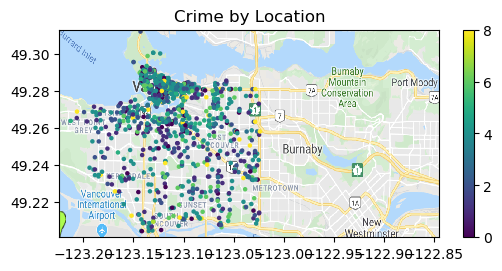

In [17]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
plt.imshow(img, zorder=0, aspect = 'auto',extent=[-123.223955, -122.8445974, 49.20089685,49.31334872])

sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['TYPE'], s = 5)
plt.colorbar()
plt.title("Crime by Location")
plt.show()

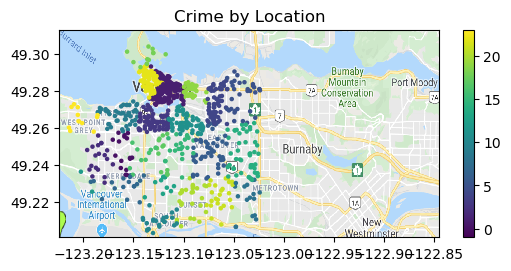

In [18]:
figure(num=None, figsize=(6.13,2.75), dpi=100, facecolor='w', edgecolor='k')
img = plt.imread('/Users/danielluo/data/vancouverpic2.png', 0)
plt.imshow(img, zorder=0, aspect = 'auto',extent=[-123.223955, -122.8445974, 49.20089685,49.31334872])

sample = cleaned.sample(1000)

plt.scatter(sample['Longitude'],sample['Latitude'], c = sample['NEIGHBOURHOOD'], s = 5)
plt.colorbar()
plt.title("Crime by Location")
plt.show()